# Checkin Report


## I. Problem Definition
<!---What is the problem that you are trying to solve? What are the challenges of this problem?-->
Explore the place and time information about checkin data in Yelp dataset.


## II. Methodology
<!---What is the problem that you are trying to solve? Briefly explain which tool(s)/technique(s) were used for which task and why you chose to implement that way.-->
### 1. Task
Preprocess & visualize the checkin data in Yelp dataset.

### 2. Solution
* Use Spark to preprocess the checkin data
    * Join the checkin data with business data on `business_id`
    * Count checkin records for every business
    * Split checkin dates strings, store each record separately
    * Extract the `year/month/hour` information for each record
* Store the  preprocessed data
* Use `pandas` to visualize the data in Jupyter Notebook
    * Read the  preprocessed data
    * Draw the bar plot`Top 10 Business with Most Checkin Records`
    * Draw the basic plots `Checkin Records Per Year`, `Checkin Records Per Month` and `Checkin Records Per Hour`
    * Compute checkin records count for every states/cities
    * Draw the pie plots `Top 5 States with Most Checkin Records` and `Top 5 Cities with Most Checkin Records`
  
### 3. Reason
* Using Spark to process the data guarantees scalability of the solution. It could deal with very big data if we have enough machines in clusters.
* Separating the frontend and backend logic by storing the preprocessed data keeps high cohesion and low coupling. We can replica the preprocessed data to improve the robustness.
* Plots with `pandas` are vivid and straightforward.
* Jupyter Notebook is cross-platform. All you need is a browser.


## III. Problems
<!---What problems did you encounter while attacking the problem? How did you solve them?-->
1. Too slow to join every single checkin record with business data
    * Store two version of data: **checkin data** with business including the **place** information and **checkin record data** including the **time** information.
    * Instead of splitting the checkin dates and then joining business data, join before split into records.  
  
  
2. How to count the checkin records for every business without splitting
    * Instead of splitting the date string, since the length of one date is fixed, we use the length of the `date` string / length of one date.  

## IV. Results
<!---What are the outcomes of the project? What did you learn from the data analysis? What did you learn from the implementation?-->
### 1. Project Outcome

#### Most Popular Business according to Checkin

In [1]:
import numpy as np
import os
import pandas as pd
import glob
from matplotlib import cm
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
path = "../../data/checkinData"
checkin_records = pd.concat([pd.read_csv(filename, sep='~') for filename in glob.glob(os.path.join(path, "checkin_records/*.csv"))], axis=0)
checkin = pd.concat([pd.read_csv(filename, sep='~') for filename in glob.glob(os.path.join(path, "checkin/*.csv"))], axis=0)

Text(0, 0.5, 'business name')

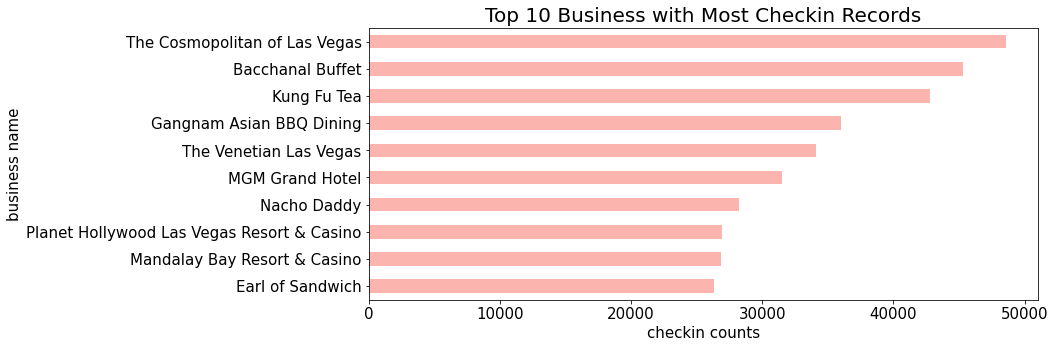

In [3]:
f, ax = plt.subplots(1, 1, figsize = (12, 5))
checkin.sort_values('checkin_count', ascending=False)[:10].set_index('name')['checkin_count'].sort_values().plot(kind='barh', fontsize=15, colormap=cm.Pastel1)
ax.set_title('Top 10 Business with Most Checkin Records', fontsize=20)
ax.set_xlabel('checkin counts', fontsize=15)
ax.set_ylabel('business name', fontsize=15)

#### Checkin Places Information

Text(0, 0.5, '')

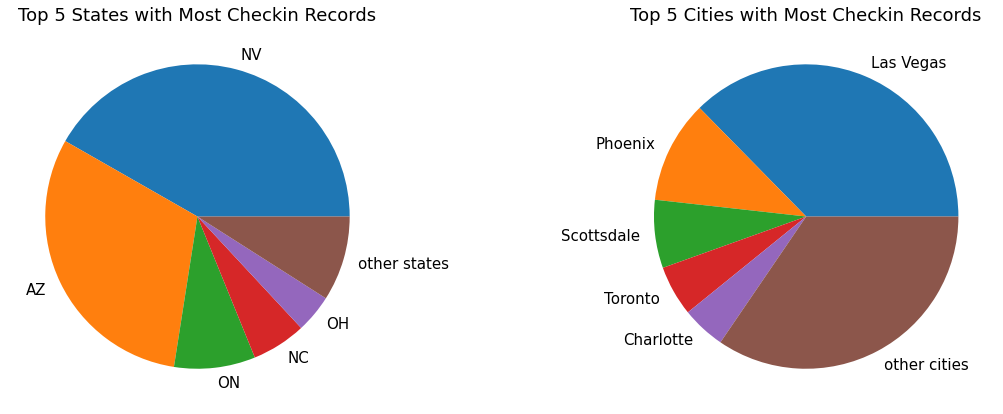

In [4]:
f, ax = plt.subplots(1, 2, figsize = (20, 7))
title_font_size = 18
topk = 5
state_checkins = checkin.groupby('state').sum()['checkin_count'].sort_values(ascending=False)
state_checkins = state_checkins[:topk].append(pd.Series({'other states': state_checkins[topk:].sum()}))
state_checkins.plot(kind='pie',fontsize=15, ax=ax[0])
ax[0].set_title('Top 5 States with Most Checkin Records', fontsize=title_font_size)
ax[0].set_ylabel('')

city_checkins = checkin.groupby('city').sum()['checkin_count'].sort_values(ascending=False)
city_checkins = city_checkins[:topk].append(pd.Series({'other cities': city_checkins[topk:].sum()}))
city_checkins.plot(kind='pie',fontsize=15, ax=ax[1])
ax[1].set_title('Top 5 Cities with Most Checkin Records', fontsize=title_font_size)
ax[1].set_ylabel('')

#### Checkin Time Information
* Checkin records increased before 2015, and decreased after 2015.
* People prefer go to restaurants in summer than in winter.
* People prefer go to restaurants for dinner than lunch.

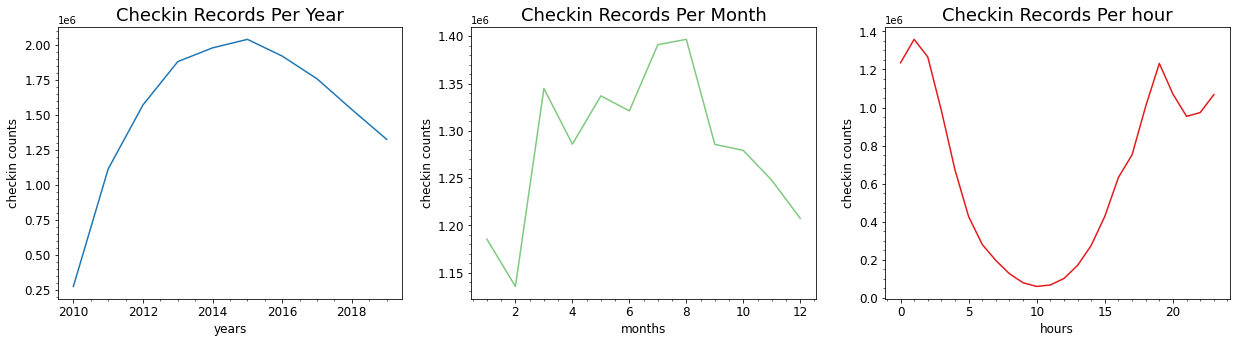

In [5]:
f, ax = plt.subplots(1, 3, figsize = (21, 5))
font_size = 12
title_font_size = 18
checkin_records['year'].value_counts().sort_index().plot(fontsize=font_size, colormap=cm.tab10, rot=0, ax=ax[0])
ax[0].set_title('Checkin Records Per Year', fontsize=title_font_size)
ax[0].set_ylabel('checkin counts', fontsize=font_size)
ax[0].set_xlabel('years', fontsize=font_size)
ax[0].minorticks_on()
checkin_records['month'].value_counts().sort_index(ascending=False).plot(fontsize=font_size, colormap=cm.Accent, ax=ax[1])
ax[1].set_title('Checkin Records Per Month', fontsize=title_font_size)
ax[1].set_ylabel('checkin counts', fontsize=font_size)
ax[1].set_xlabel('months', fontsize=font_size)
ax[1].minorticks_on()
checkin_records['hour'].value_counts().sort_index().plot( fontsize=font_size, colormap=cm.Set1, rot=0, ax=ax[2])
ax[2].set_title('Checkin Records Per hour', fontsize=title_font_size)
ax[2].set_ylabel('checkin counts', fontsize=font_size)
ax[2].set_xlabel('hours', fontsize=font_size)
ax[2].minorticks_on()

### 2. Lessons from the project
* data analysis: Spark and Pandas visulizaion techniques  
* code implementation: We need to try our best to improve the program performance such as speed and robustness.